In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

%matplotlib inline

In [40]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Exploratory Analysis

In [11]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [41]:
df.isna().sum(axis=0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [16]:
df.nunique()

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

# How features affect target

In [64]:
# calculate overall conversion rate
(df['converted'].agg(['count', np.sum]))
conversion_rate = 10197/315963
conversion_rate

0.032272766115019794

Text(0, 0.5, 'conversion rate')

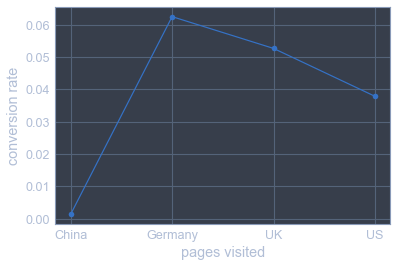

In [89]:
# calcualte the conversion rate for each country
# temp = (df
#  .groupby('country')
#  .agg(counts=('age', np.size), 
#       converted=('converted', lambda x: np.sum(x==1)))
#  .assign(conversion_rate=lambda df: df['converted'] / df['counts']))

temp = df.groupby('country')['converted'].mean()  # mean will give the conversion rate
 
fig, ax = plt.subplots()
ax.plot(temp.index, temp.values, 'o-')
ax.set_xlabel('pages visited')
ax.set_ylabel('conversion rate')

(array([46534., 50457., 56514., 66284., 40981., 27339., 18260.,  6199.,
         2476.,   919.]),
 array([17. , 21.3, 25.6, 29.9, 34.2, 38.5, 42.8, 47.1, 51.4, 55.7, 60. ]),
 <a list of 10 Patch objects>)

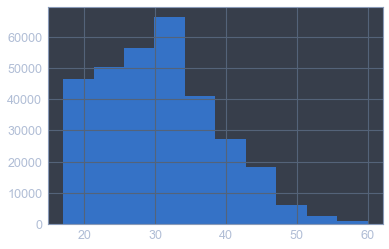

In [66]:
# distribution of age
fig, ax = plt.subplots()
ax.hist(df['age'])

In [67]:
df = df.loc[df['age']<=60]

Text(0, 0.5, 'conversion rate')

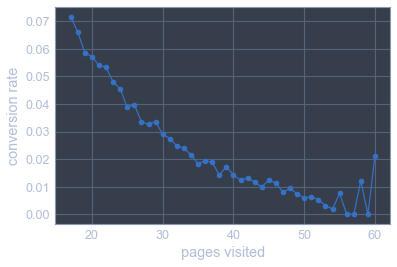

In [91]:
# calcualte the conversion rate for age
temp = df.groupby('age')['converted'].mean()

fig, ax = plt.subplots()
ax.plot(temp.index, temp.values, 'o-')
ax.set_xlabel('pages visited')
ax.set_ylabel('conversion rate')

In [92]:
df.groupby('new_user')['converted'].mean()

new_user
0    0.072029
1    0.014031
Name: converted, dtype: float64

In [94]:
df.groupby('source')['converted'].mean()

source
Ads       0.034499
Direct    0.028192
Seo       0.032905
Name: converted, dtype: float64

In [95]:
df.groupby('total_pages_visited')['converted'].mean()

total_pages_visited
1     0.000000
2     0.000228
3     0.000251
4     0.000780
5     0.001571
6     0.003439
7     0.006776
8     0.015248
9     0.033015
10    0.061090
11    0.123539
12    0.244672
13    0.400825
14    0.587521
15    0.740181
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: converted, dtype: float64

the effects of different features are quite clear. We should be able to build a model with good prediction accuracy.

In [74]:
# for the numerical features, calculate their correlation with target
columns = ['age', 'new_user', 'total_pages_visited', 'converted']
corr = df[columns].corr(method='pearson')
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.012607,-0.046054,-0.089253
new_user,0.012607,1.000000,-0.082524,-0.152383
total_pages_visited,-0.046054,-0.082524,1.000000,0.529083
converted,-0.089253,-0.152383,0.529083,1.000000


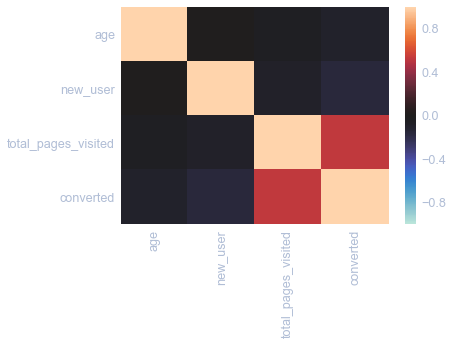

In [77]:
sns.heatmap(corr, center=0, vmin=-1, vmax=1)

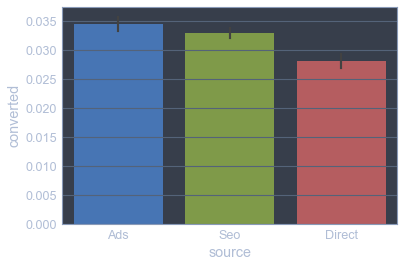

In [78]:
sns.barplot(x='source',y='converted',data=df)

In [14]:
df_country = pd.get_dummies(df['country'])
df = pd.concat([df, df_country], axis=1)
df_source = pd.get_dummies(df['source'])
df = pd.concat([df, df_source], axis=1)
df.head()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,UK,25,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['total_pages_visited','China','Germany','UK','US','Ads','Direct','Seo','age','new_user']], df['converted'], test_size=0.33, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
forest.score(X_test,y_test)

0.98436930979625481

The accuracy on the test set is 98%, the baseline accuracy is:

In [29]:
1-sum(df['converted'])/len(df['converted'])

0.967741935483871

Feature ranking:
1. feature 0 (0.809667)
2. feature 8 (0.114073)
3. feature 9 (0.038737)
4. feature 1 (0.020798)
5. feature 4 (0.003662)
6. feature 2 (0.003090)
7. feature 7 (0.002851)
8. feature 5 (0.002533)
9. feature 6 (0.002339)
10. feature 3 (0.002249)


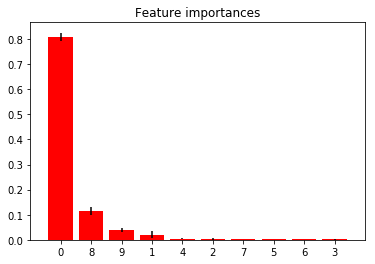

In [26]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The most important feature is total_pages_visited. However, it is difficult for the company to cause people to visit more pages. Also, people probably visit more pages to buy things anyway, so it is probably caused by the action of a purchase, rather than causing a purchase.

Now I will remove `total_pages_visited` since it is now really helpful to the company.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['China','Germany','UK','US','Ads','Direct','Seo','age','new_user']], df['converted'], test_size=0.33, random_state=42)
forest = RandomForestClassifier(random_state=42,class_weight={0: 0.7, 1: 0.3})
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, class_weight={0: 0.7, 1: 0.3},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [34]:
forest.score(X_test,y_test)

0.9685565330726621

The accuracy on the test set is now similar to the baseline accuracy.

Feature ranking:
1. feature 8 (0.404159)
2. feature 7 (0.347301)
3. feature 0 (0.137011)
4. feature 2 (0.035515)
5. feature 3 (0.028407)
6. feature 1 (0.024451)
7. feature 5 (0.008243)
8. feature 4 (0.007547)
9. feature 6 (0.007366)


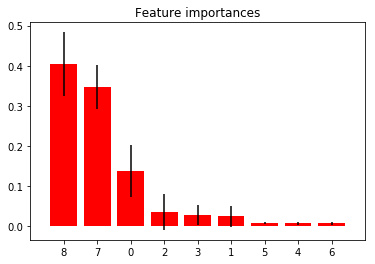

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

After removing the `total_pages_visited` the most important feature is now whether the user is a new user or not.

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,class_weight={0: 0.7, 1: 0.3})
clf.fit(X_train, y_train)

tree.export_graphviz(clf,out_file='tree.dot')

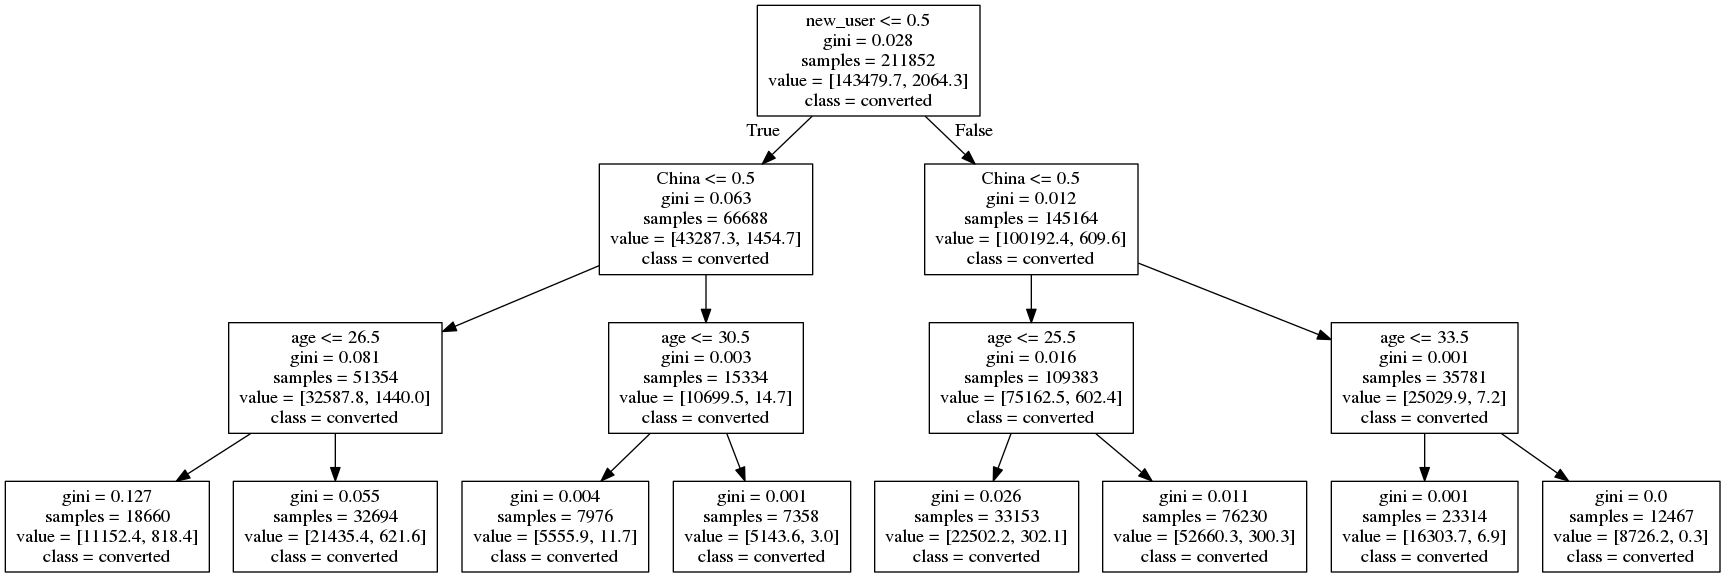

In [25]:
from io import StringIO
import pydotplus
from IPython.display import Image
out = StringIO()
tree.export_graphviz(clf, out_file = out,feature_names=['China','Germany','UK','US','Ads','Direct','Seo','age','new_user'],  
                         class_names=['converted'])
 
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

The first split of the decision tree is whether or not it is a new user. Thus, the site should try to incentivize older users to come back. The next split of the tree is on country, and the tree is split on the user not being from China. Since China has a large population, the site should try to increase the number of Chinese visitors. The third level is split on age. Basically, the site works better for young users (less than about 30 years of age). Thus, the site should advertise towards young people to maximize the conversion rate of their target audience.